# Examen Práctico de Estadística Descriptiva

En este cuaderno se desarrolla el examen práctico sobre el análisis de matrículas en educación superior para la región de Valparaíso en 2021. 

Se aplican conceptos de estadística descriptiva, modelos de regresión y probabilidades para responder las preguntas planteadas. El dataset proviene de la base oficial de matrículas y contiene información sobre instituciones, carreras, modalidades y características de los estudiantes.

## Ítem 1: Relaciones entre valores económicos y duración

En este apartado se analiza la correlación entre los distintos valores económicos y la extensión de las carreras.

1. **Matrícula vs Arancel**: se calcula la correlación entre el valor de la matrícula y el valor del arancel para todo el conjunto de datos y luego se repite el cálculo por tipo de institución (`TIPO DE INSTITUCION`). Se visualiza la relación mediante un diagrama de dispersión.

2. **Arancel vs Duración total de la carrera**: se estudia la relación entre el valor del arancel y la duración total de la carrera (`DURACION TOTAL CARRERA (SEMESTRES)`). Se comprueba la hipótesis de que carreras más largas tienden a ser más costosas y se examina si este patrón es igual en todas las áreas del conocimiento (`AREA CONOCIMIENTO`).

A continuación se presentan los códigos correspondientes.import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración de pandas para mostrar números sin notación científica
pd.options.display.float_format = '{:,.2f}'.format

# Cargar dataset
file_path = '06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx'
df = pd.read_excel(file_path)

# Mostrar primeras filas y columnas
print(df.head())
print("\nColumnas:", df.columns.tolist())

In [24]:
# Importar bibliotecas y cargar base completa (puede tardar unos segundos)
import pandas as pd
import matplotlib.pyplot as plt

file_path = '06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx'

df = pd.read_excel(file_path)

# Mostrar las dimensiones del DataFrame
print('Base cargada con dimensiones:', df.shape)


Base cargada con dimensiones: (109198, 28)


In [25]:
# Cargar solo las columnas relevantes para el análisis
import pandas as pd
import matplotlib.pyplot as plt

cols = ['VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)',
        'DURACION TOTAL CARRERA (SEMESTRES)', 'TIPO DE INSTITUCION',
        'AREA CONOCIMIENTO', 'MODALIDAD', 'GENERO']

file_path = '06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx'
# Lectura de la hoja completa puede tomar tiempo, por lo que seleccionamos solo las columnas relevantes
exam_df = pd.read_excel(file_path, usecols=cols)

# Eliminamos registros con datos faltantes en las columnas esenciales
exam_df = exam_df.dropna(subset=['VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)',
                                'DURACION TOTAL CARRERA (SEMESTRES)'])

# Visualizar las primeras filas
display(exam_df.head())
print("Dimensión del DataFrame:", exam_df.shape)
# Crear subconjunto con columnas relevantes a partir del DataFrame cargado previamente
df_cols = ['VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)',
           'DURACION TOTAL CARRERA (SEMESTRES)', 'TIPO DE INSTITUCION',
           'AREA CONOCIMIENTO', 'MODALIDAD', 'GENERO']

exam_df = df[df_cols].dropna()

# Revisar tamaño del subconjunto
print('Dimensión del subconjunto:', exam_df.shape)

# Mostrar algunas filas
display(exam_df.head())

,GENERO,TIPO DE INSTITUCION,MODALIDAD,AREA CONOCIMIENTO,DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS)
0,Femenino,Universidades Privadas,Presencial,Salud,10,130000,3713000
1,Femenino,Institutos Profesionales,Presencial,Administracion y Comercio,8,190000,1900000
2,Masculino,Institutos Profesionales,Presencial,Administracion y Comercio,8,190000,1760000
3,Masculino,Universidades CRUCH,Presencial,Educacion,9,208000,2558000
4,Masculino,Universidades CRUCH,Presencial,Arte y Arquitectura,11,186000,4350000


Dimensión del DataFrame: (109198, 7)
Dimensión del subconjunto: (109198, 7)


,VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),DURACION TOTAL CARRERA (SEMESTRES),TIPO DE INSTITUCION,AREA CONOCIMIENTO,MODALIDAD,GENERO
0,130000,3713000,10,Universidades Privadas,Salud,Presencial,Femenino
1,190000,1900000,8,Institutos Profesionales,Administracion y Comercio,Presencial,Femenino
2,190000,1760000,8,Institutos Profesionales,Administracion y Comercio,Presencial,Masculino
3,208000,2558000,9,Universidades CRUCH,Educacion,Presencial,Masculino
4,186000,4350000,11,Universidades CRUCH,Arte y Arquitectura,Presencial,Masculino


Subconjunto creado con 109198 registros.
Correlación global entre matrícula y arancel: 0.5657

Correlación por tipo de institución:
TIPO DE INSTITUCION
Centros de Formacion Tecnica    0.554010
Institutos Profesionales        0.708667
Universidades CRUCH             0.451659
Universidades Privadas          0.631326
dtype: float64


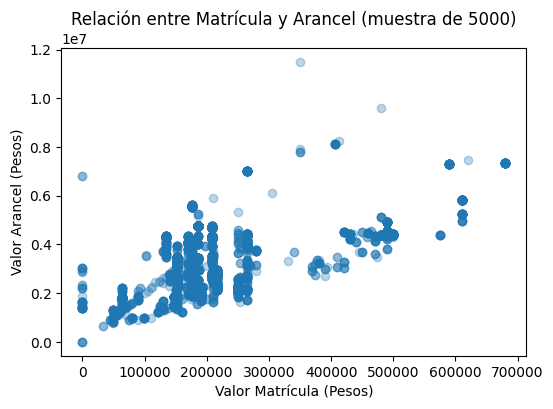

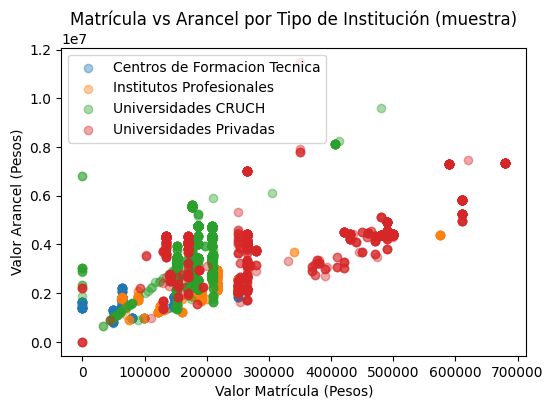

In [26]:
# Crear subconjunto exam_df con columnas relevantes a partir de df ya cargado
cols_sub = ['VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)',
            'DURACION TOTAL CARRERA (SEMESTRES)', 'TIPO DE INSTITUCION',
            'AREA CONOCIMIENTO', 'MODALIDAD', 'GENERO']

exam_df = df[cols_sub].dropna()
print('Subconjunto creado con', exam_df.shape[0], 'registros.')
exam_df.head()# Pregunta 1: Matrícula vs Arancel
# Calcular correlación global
corr_global = exam_df['VALOR MATRICULA (PESOS)'].corr(exam_df['VALOR ARANCEL (PESOS)'])
print(f"Correlación global entre matrícula y arancel: {corr_global:.4f}")

# Calcular correlación por tipo de institución
corr_por_tipo = exam_df.groupby('TIPO DE INSTITUCION').apply(
    lambda g: g['VALOR MATRICULA (PESOS)'].corr(g['VALOR ARANCEL (PESOS)'])
)
print("\nCorrelación por tipo de institución:")
print(corr_por_tipo)

# Visualización global (muestra aleatoria para mayor claridad)
sample_df = exam_df.sample(n=5000, random_state=42)

plt.figure(figsize=(6,4))
plt.scatter(sample_df['VALOR MATRICULA (PESOS)'], sample_df['VALOR ARANCEL (PESOS)'], alpha=0.3)
plt.xlabel('Valor Matrícula (Pesos)')
plt.ylabel('Valor Arancel (Pesos)')
plt.title('Relación entre Matrícula y Arancel (muestra de 5000)')
plt.show()

# Visualización por tipo de institución
plt.figure(figsize=(6,4))
for tipo, grupo in sample_df.groupby('TIPO DE INSTITUCION'):
    plt.scatter(grupo['VALOR MATRICULA (PESOS)'], grupo['VALOR ARANCEL (PESOS)'], alpha=0.4, label=tipo)

plt.xlabel('Valor Matrícula (Pesos)')
plt.ylabel('Valor Arancel (Pesos)')
plt.title('Matrícula vs Arancel por Tipo de Institución (muestra)')
plt.legend()
plt.show()

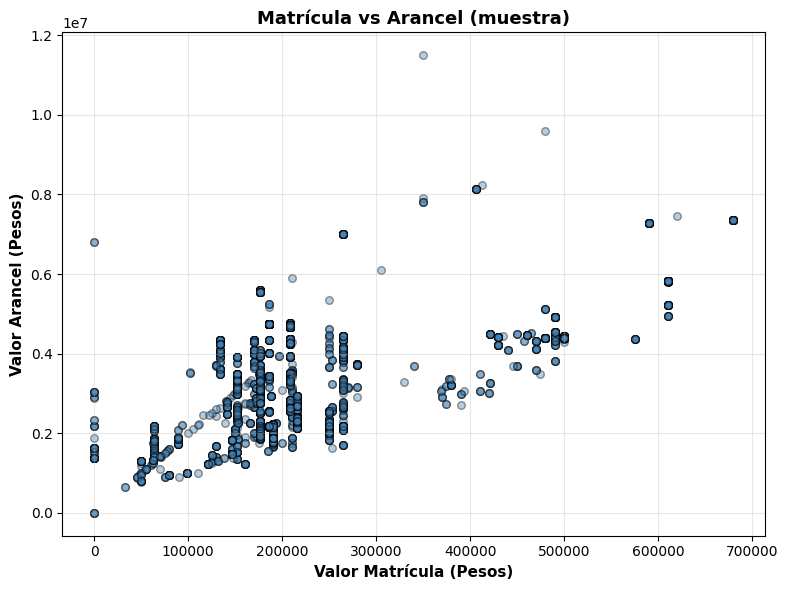


--- Histograma: Valor Matrícula

ANÁLISIS DE NORMALIDAD: VALOR DE MATRÍCULA (PESOS)
Media:                         218,661.92
Mediana:                       190,000.00
Moda:                          176,000.00
Desviación Estándar:           112,986.74

Coeficiente de Asimetría:               2.0063
Coeficiente de Curtosis:                4.3879

--- Interpretación ---
Asimetría: Asimétrica POSITIVA (sesgo hacia la derecha)
Curtosis:  Leptocúrtica (mayor concentración en el centro)

¿Sigue distribución normal? ✗ NO



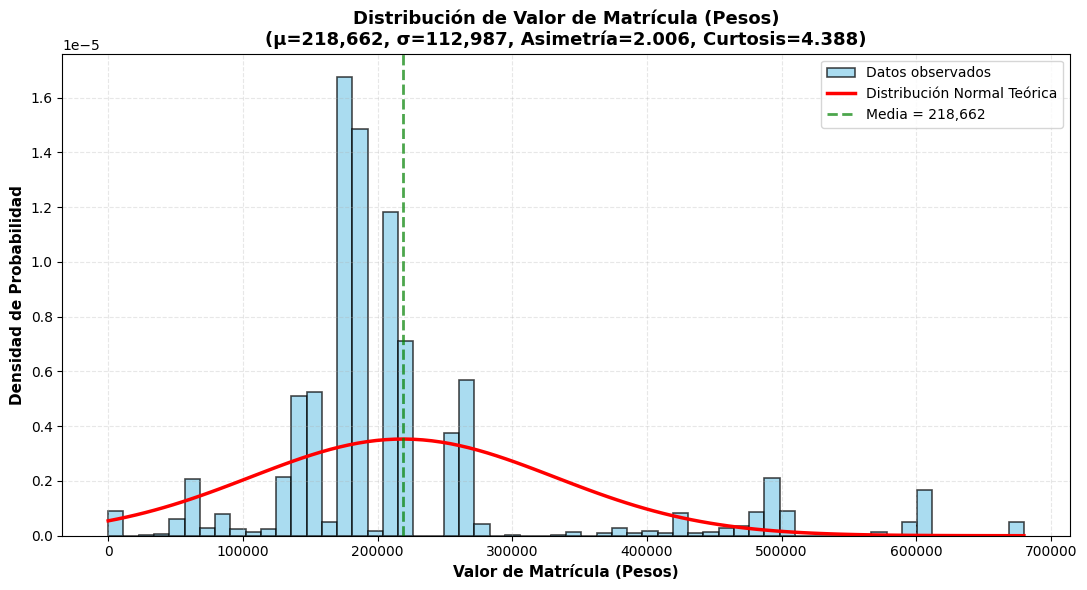


--- Histograma: Valor Arancel

ANÁLISIS DE NORMALIDAD: VALOR DE ARANCEL (PESOS)
Media:                       3,137,793.21
Mediana:                     2,895,000.00
Moda:                        4,740,000.00
Desviación Estándar:         1,307,897.36

Coeficiente de Asimetría:               0.8442
Coeficiente de Curtosis:                0.9697

--- Interpretación ---
Asimetría: Asimétrica POSITIVA (sesgo hacia la derecha)
Curtosis:  Leptocúrtica (mayor concentración en el centro)

¿Sigue distribución normal? ✗ NO



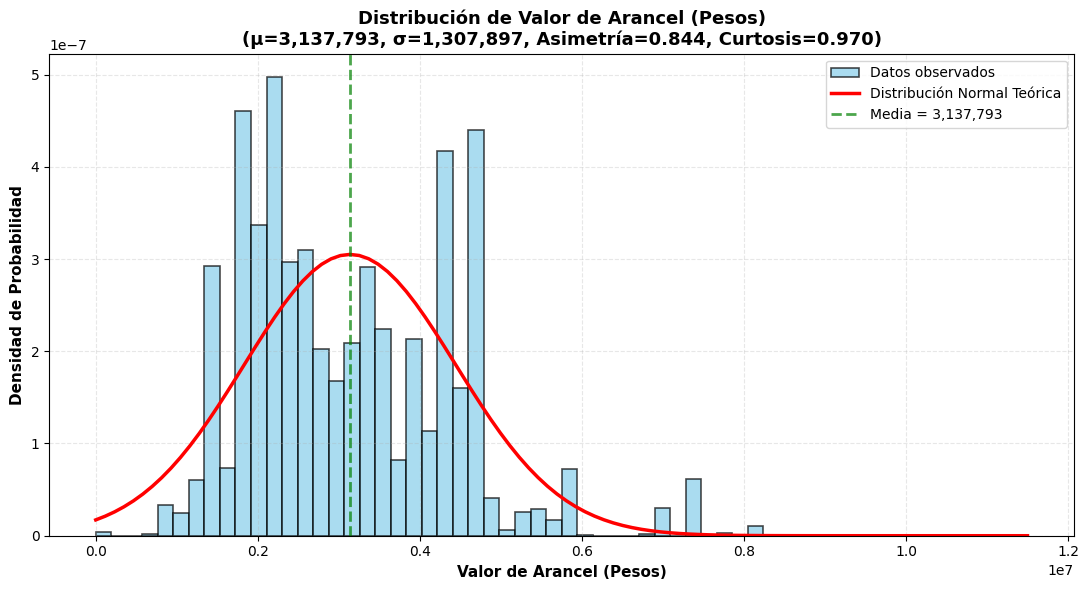

(3137793.2074,
 1307897.3589179583,
 0.8442037161453889,
 0.9697054394429383,
 False)

In [27]:
# Scatter: Valor Matrícula vs Valor Arancel (separado)
plt.figure(figsize=(8,6))
try:
    data_scatter = sample_df
except NameError:
    data_scatter = exam_df.sample(n=5000, random_state=42)

plt.scatter(data_scatter['VALOR MATRICULA (PESOS)'], data_scatter['VALOR ARANCEL (PESOS)'],
            alpha=0.4, s=30, color='steelblue', edgecolor='k')
plt.xlabel('Valor Matrícula (Pesos)', fontsize=11, fontweight='bold')
plt.ylabel('Valor Arancel (Pesos)', fontsize=11, fontweight='bold')
plt.title('Matrícula vs Arancel (muestra)', fontsize=13, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Histogramas separados con campana de Gauss
# Histograma Valor Matrícula
print('\n--- Histograma: Valor Matrícula')
analizar_normalidad(data_scatter['VALOR MATRICULA (PESOS)'], 'Valor de Matrícula (Pesos)', bins=60)

# Histograma Valor Arancel
print('\n--- Histograma: Valor Arancel')
analizar_normalidad(data_scatter['VALOR ARANCEL (PESOS)'], 'Valor de Arancel (Pesos)', bins=60)


## Análisis de Distribución Normal - Basado en Laboratorio 8

En esta sección se realizará un análisis similar al Laboratorio 8, evaluando si las variables continuas siguen una distribución normal mediante el cálculo de medidas de tendencia central, asimetría, curtosis e histogramas con curvas de Gauss.

In [28]:
import scipy.stats as st

# Función para análisis completo de normalidad (similar al Laboratorio 8)
def analizar_normalidad(data, nombre_variable, bins=50):
    """
    Realiza análisis completo de normalidad: estadísticas, gráfico y evaluación
    """
    data_clean = data.dropna()
    
    # Medidas de tendencia central
    media = data_clean.mean()
    mediana = data_clean.median()
    moda_result = data_clean.mode()
    desv_est = data_clean.std()
    
    # Coeficientes
    asimetria = st.skew(data_clean)
    curtosis = st.kurtosis(data_clean)
    
    # Imprimir resultados
    print(f"\n{'='*70}")
    print(f"ANÁLISIS DE NORMALIDAD: {nombre_variable.upper()}")
    print(f"{'='*70}")
    print(f"Media:                    {media:>15,.2f}")
    print(f"Mediana:                  {mediana:>15,.2f}")
    if len(moda_result) > 0:
        print(f"Moda:                     {moda_result[0]:>15,.2f}")
    print(f"Desviación Estándar:      {desv_est:>15,.2f}")
    print(f"\nCoeficiente de Asimetría: {asimetria:>20.4f}")
    print(f"Coeficiente de Curtosis:  {curtosis:>20.4f}")
    
    # Interpretación de asimetría
    print(f"\n--- Interpretación ---")
    if -0.5 <= asimetria <= 0.5:
        print(f"Asimetría: Simétrica (distribución aproximadamente normal)")
    elif asimetria > 0.5:
        print(f"Asimetría: Asimétrica POSITIVA (sesgo hacia la derecha)")
    else:
        print(f"Asimetría: Asimétrica NEGATIVA (sesgo hacia la izquierda)")
    
    # Interpretación de curtosis
    if -0.5 <= curtosis <= 0.5:
        print(f"Curtosis:  Mesocúrtica (concentración normal en el centro)")
    elif curtosis > 0.5:
        print(f"Curtosis:  Leptocúrtica (mayor concentración en el centro)")
    else:
        print(f"Curtosis:  Platicúrtica (menor concentración en el centro)")
    
    # Evaluar normalidad
    es_normal = (-0.5 <= asimetria <= 0.5) and (-0.5 <= curtosis <= 0.5)
    print(f"\n¿Sigue distribución normal? {'✓ SÍ (aproximadamente)' if es_normal else '✗ NO'}")
    print(f"{'='*70}\n")
    
    # Crear histograma con curva normal
    fig, ax = plt.subplots(figsize=(11, 6))
    
    n, bins_edges, patches = ax.hist(data_clean, bins=bins, density=True, alpha=0.7, 
                                      color='skyblue', edgecolor='black', linewidth=1.2,
                                      label='Datos observados')
    
    # Curva de distribución normal
    x = np.linspace(data_clean.min(), data_clean.max(), 100)
    y = norm.pdf(x, media, desv_est)
    ax.plot(x, y, 'r-', linewidth=2.5, label=f'Distribución Normal Teórica')
    
    # Línea de media
    ax.axvline(media, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Media = {media:,.0f}')
    
    ax.set_title(f'Distribución de {nombre_variable}\n(μ={media:,.0f}, σ={desv_est:,.0f}, Asimetría={asimetria:.3f}, Curtosis={curtosis:.3f})',
                fontsize=13, fontweight='bold')
    ax.set_xlabel(nombre_variable, fontsize=11, fontweight='bold')
    ax.set_ylabel('Densidad de Probabilidad', fontsize=11, fontweight='bold')
    ax.legend(fontsize=10, loc='upper right')
    ax.grid(alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    return media, desv_est, asimetria, curtosis, es_normal

print("✓ Función de análisis de normalidad cargada (estilo Laboratorio 8)")

✓ Función de análisis de normalidad cargada (estilo Laboratorio 8)



██████████████████████████████████████████████████████████████████████
█                                                                    █
█                   ANÁLISIS 1: VALOR DE MATRÍCULA                   █
█                                                                    █
██████████████████████████████████████████████████████████████████████

ANÁLISIS DE NORMALIDAD: VALOR DE MATRÍCULA (PESOS)
Media:                         219,393.35
Mediana:                       190,000.00
Moda:                          176,000.00
Desviación Estándar:           114,142.33

Coeficiente de Asimetría:               3.5779
Coeficiente de Curtosis:               57.0124

--- Interpretación ---
Asimetría: Asimétrica POSITIVA (sesgo hacia la derecha)
Curtosis:  Leptocúrtica (mayor concentración en el centro)

¿Sigue distribución normal? ✗ NO



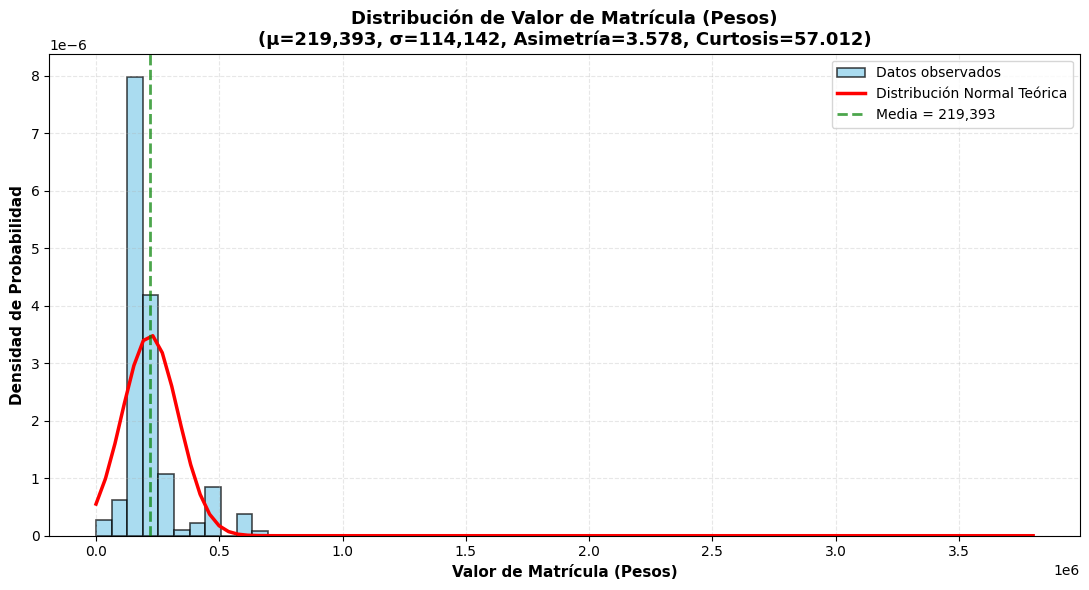

In [29]:
# Análisis 1: VALOR DE MATRÍCULA
print("\n" + "█"*70)
print("█" + " "*68 + "█")
print("█" + "ANÁLISIS 1: VALOR DE MATRÍCULA".center(68) + "█")
print("█" + " "*68 + "█")
print("█"*70)

media_mat, desv_mat, asim_mat, curt_mat, es_norm_mat = analizar_normalidad(
    exam_df['VALOR MATRICULA (PESOS)'],
    'Valor de Matrícula (Pesos)',
    bins=60
)


██████████████████████████████████████████████████████████████████████
█                                                                    █
█                    ANÁLISIS 2: VALOR DE ARANCEL                    █
█                                                                    █
██████████████████████████████████████████████████████████████████████

ANÁLISIS DE NORMALIDAD: VALOR DE ARANCEL (PESOS)
Media:                       3,141,604.99
Mediana:                     2,899,000.00
Moda:                        4,740,000.00
Desviación Estándar:         1,270,628.80

Coeficiente de Asimetría:               0.7550
Coeficiente de Curtosis:                0.8780

--- Interpretación ---
Asimetría: Asimétrica POSITIVA (sesgo hacia la derecha)
Curtosis:  Leptocúrtica (mayor concentración en el centro)

¿Sigue distribución normal? ✗ NO



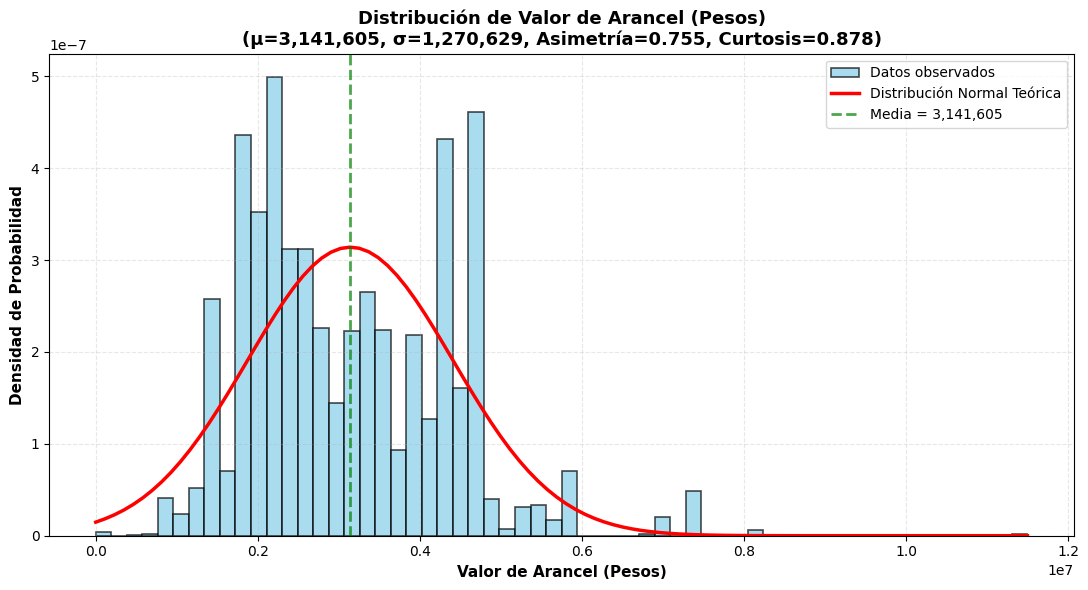

In [30]:
# Análisis 2: VALOR DE ARANCEL
print("\n" + "█"*70)
print("█" + " "*68 + "█")
print("█" + "ANÁLISIS 2: VALOR DE ARANCEL".center(68) + "█")
print("█" + " "*68 + "█")
print("█"*70)

media_ar, desv_ar, asim_ar, curt_ar, es_norm_ar = analizar_normalidad(
    exam_df['VALOR ARANCEL (PESOS)'],
    'Valor de Arancel (Pesos)',
    bins=60
)


██████████████████████████████████████████████████████████████████████
█                                                                    █
█               ANÁLISIS 3: DURACIÓN TOTAL DE CARRERA                █
█                                                                    █
██████████████████████████████████████████████████████████████████████

ANÁLISIS DE NORMALIDAD: DURACIÓN TOTAL DE CARRERA (SEMESTRES)
Media:                               8.19
Mediana:                             9.00
Moda:                               10.00
Desviación Estándar:                 2.60

Coeficiente de Asimetría:              -0.3069
Coeficiente de Curtosis:               -0.9025

--- Interpretación ---
Asimetría: Simétrica (distribución aproximadamente normal)
Curtosis:  Platicúrtica (menor concentración en el centro)

¿Sigue distribución normal? ✗ NO



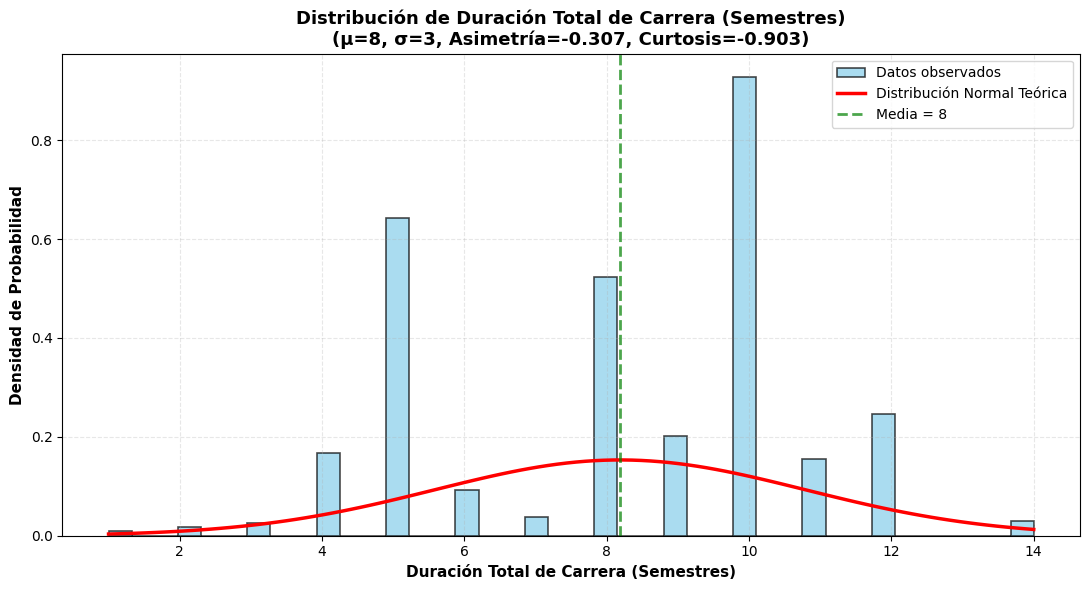

In [31]:
# Análisis 3: DURACIÓN TOTAL DE CARRERA
print("\n" + "█"*70)
print("█" + " "*68 + "█")
print("█" + "ANÁLISIS 3: DURACIÓN TOTAL DE CARRERA".center(68) + "█")
print("█" + " "*68 + "█")
print("█"*70)

media_dur, desv_dur, asim_dur, curt_dur, es_norm_dur = analizar_normalidad(
    exam_df['DURACION TOTAL CARRERA (SEMESTRES)'],
    'Duración Total de Carrera (Semestres)',
    bins=40
)

## Cálculo de Probabilidades bajo Distribución Normal

Utilizando las propiedades de la distribución normal para cada variable, se calculan probabilidades para diferentes intervalos, similar al Laboratorio 8.

In [32]:
# PROBABILIDADES VALOR DE MATRÍCULA
print("\n" + "="*70)
print("PROBABILIDADES: VALOR DE MATRÍCULA")
print("="*70)

# P(X < media - σ)
prob_menor_1sigma = st.norm.cdf(media_mat - desv_mat, media_mat, desv_mat) * 100
print(f"P(X < μ - σ) = P(X < ${media_mat - desv_mat:,.0f}):  {prob_menor_1sigma:.2f}%")

# P(X > media + σ)
prob_mayor_1sigma = (1 - st.norm.cdf(media_mat + desv_mat, media_mat, desv_mat)) * 100
print(f"P(X > μ + σ) = P(X > ${media_mat + desv_mat:,.0f}):  {prob_mayor_1sigma:.2f}%")

# P(μ - σ < X < μ + σ)
prob_1sigma = (st.norm.cdf(media_mat + desv_mat, media_mat, desv_mat) - 
               st.norm.cdf(media_mat - desv_mat, media_mat, desv_mat)) * 100
print(f"P(μ - σ < X < μ + σ):                            {prob_1sigma:.2f}%")

# P(μ - 2σ < X < μ + 2σ)
prob_2sigma = (st.norm.cdf(media_mat + 2*desv_mat, media_mat, desv_mat) - 
               st.norm.cdf(media_mat - 2*desv_mat, media_mat, desv_mat)) * 100
print(f"P(μ - 2σ < X < μ + 2σ):                          {prob_2sigma:.2f}%")
print()

# PROBABILIDADES VALOR DE ARANCEL
print("="*70)
print("PROBABILIDADES: VALOR DE ARANCEL")
print("="*70)

prob_menor_1sigma_ar = st.norm.cdf(media_ar - desv_ar, media_ar, desv_ar) * 100
print(f"P(X < μ - σ) = P(X < ${media_ar - desv_ar:,.0f}):  {prob_menor_1sigma_ar:.2f}%")

prob_mayor_1sigma_ar = (1 - st.norm.cdf(media_ar + desv_ar, media_ar, desv_ar)) * 100
print(f"P(X > μ + σ) = P(X > ${media_ar + desv_ar:,.0f}):  {prob_mayor_1sigma_ar:.2f}%")

prob_1sigma_ar = (st.norm.cdf(media_ar + desv_ar, media_ar, desv_ar) - 
                  st.norm.cdf(media_ar - desv_ar, media_ar, desv_ar)) * 100
print(f"P(μ - σ < X < μ + σ):                            {prob_1sigma_ar:.2f}%")

prob_2sigma_ar = (st.norm.cdf(media_ar + 2*desv_ar, media_ar, desv_ar) - 
                  st.norm.cdf(media_ar - 2*desv_ar, media_ar, desv_ar)) * 100
print(f"P(μ - 2σ < X < μ + 2σ):                          {prob_2sigma_ar:.2f}%")
print()

# PROBABILIDADES DURACIÓN CARRERA
print("="*70)
print("PROBABILIDADES: DURACIÓN DE CARRERA (SEMESTRES)")
print("="*70)

prob_menor_1sigma_dur = st.norm.cdf(media_dur - desv_dur, media_dur, desv_dur) * 100
print(f"P(X < μ - σ) = P(X < {media_dur - desv_dur:.1f} sem):      {prob_menor_1sigma_dur:.2f}%")

prob_mayor_1sigma_dur = (1 - st.norm.cdf(media_dur + desv_dur, media_dur, desv_dur)) * 100
print(f"P(X > μ + σ) = P(X > {media_dur + desv_dur:.1f} sem):      {prob_mayor_1sigma_dur:.2f}%")

prob_1sigma_dur = (st.norm.cdf(media_dur + desv_dur, media_dur, desv_dur) - 
                   st.norm.cdf(media_dur - desv_dur, media_dur, desv_dur)) * 100
print(f"P(μ - σ < X < μ + σ):                            {prob_1sigma_dur:.2f}%")

prob_2sigma_dur = (st.norm.cdf(media_dur + 2*desv_dur, media_dur, desv_dur) - 
                   st.norm.cdf(media_dur - 2*desv_dur, media_dur, desv_dur)) * 100
print(f"P(μ - 2σ < X < μ + 2σ):                          {prob_2sigma_dur:.2f}%")
print("="*70)


PROBABILIDADES: VALOR DE MATRÍCULA
P(X < μ - σ) = P(X < $105,251):  15.87%
P(X > μ + σ) = P(X > $333,536):  15.87%
P(μ - σ < X < μ + σ):                            68.27%
P(μ - 2σ < X < μ + 2σ):                          95.45%

PROBABILIDADES: VALOR DE ARANCEL
P(X < μ - σ) = P(X < $1,870,976):  15.87%
P(X > μ + σ) = P(X > $4,412,234):  15.87%
P(μ - σ < X < μ + σ):                            68.27%
P(μ - 2σ < X < μ + 2σ):                          95.45%

PROBABILIDADES: DURACIÓN DE CARRERA (SEMESTRES)
P(X < μ - σ) = P(X < 5.6 sem):      15.87%
P(X > μ + σ) = P(X > 10.8 sem):      15.87%
P(μ - σ < X < μ + σ):                            68.27%
P(μ - 2σ < X < μ + 2σ):                          95.45%


### Pregunta 2: Relación entre arancel y duración de la carrera

Se analiza la relación entre el valor del arancel y la duración total de la carrera (en semestres). Se calcula la correlación global y se examina cómo varía esta asociación según el área del conocimiento. Además, se visualiza la distribución mediante gráficos de dispersión y se presenta un diagrama de barras con las correlaciones por área.


Correlación global entre arancel y duración: 0.6740

Correlación por área de conocimiento:
AREA CONOCIMIENTO
Administracion y Comercio    0.378860
Agropecuaria                 0.920206
Arte y Arquitectura          0.822409
Ciencias Basicas             0.341214
Ciencias Sociales            0.699482
Derecho                      0.534985
Educacion                    0.676436
Humanidades                  0.716808
Salud                        0.753190
Tecnologia                   0.690305
dtype: float64


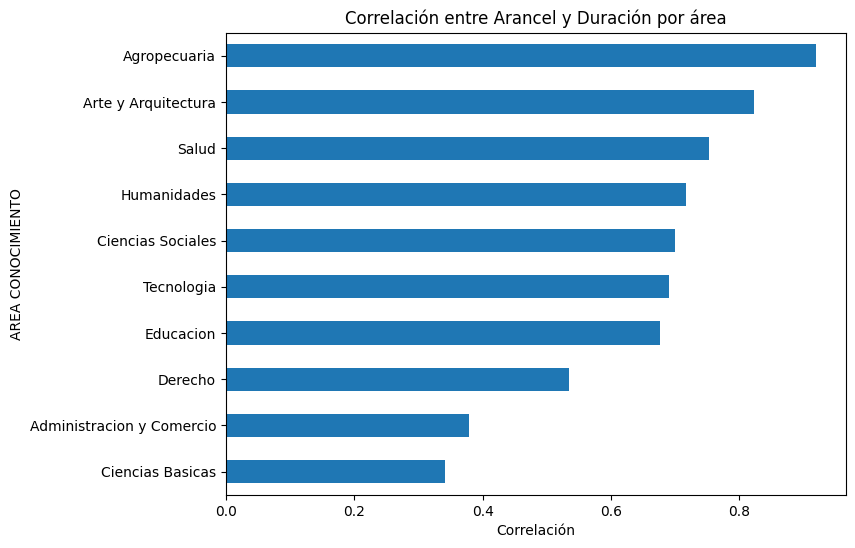

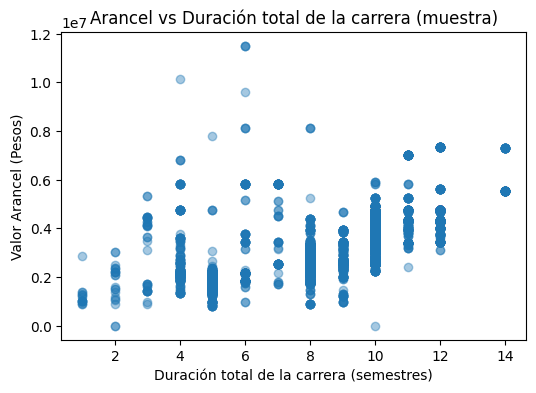

In [33]:
# Calcular correlación global entre arancel y duración
duracion = exam_df['DURACION TOTAL CARRERA (SEMESTRES)']
arancel = exam_df['VALOR ARANCEL (PESOS)']
corr_arancel_duracion = arancel.corr(duracion)
print(f"Correlación global entre arancel y duración: {corr_arancel_duracion:.4f}")

# Calcular correlación por área de conocimiento
corr_por_area = exam_df.groupby('AREA CONOCIMIENTO').apply(
    lambda g: g['VALOR ARANCEL (PESOS)'].corr(g['DURACION TOTAL CARRERA (SEMESTRES)'])
)

print("\nCorrelación por área de conocimiento:")
print(corr_por_area)

# Diagrama de barras de correlaciones por área
plt.figure(figsize=(8,6))
corr_por_area.sort_values().plot(kind='barh')
plt.xlabel('Correlación')
plt.title('Correlación entre Arancel y Duración por área')
plt.show()

# Gráfico de dispersión global (muestra)
sample2 = exam_df.sample(n=5000, random_state=24)
plt.figure(figsize=(6,4))
plt.scatter(sample2['DURACION TOTAL CARRERA (SEMESTRES)'], sample2['VALOR ARANCEL (PESOS)'], alpha=0.4)
plt.xlabel('Duración total de la carrera (semestres)')
plt.ylabel('Valor Arancel (Pesos)')
plt.title('Arancel vs Duración total de la carrera (muestra)')
plt.show()

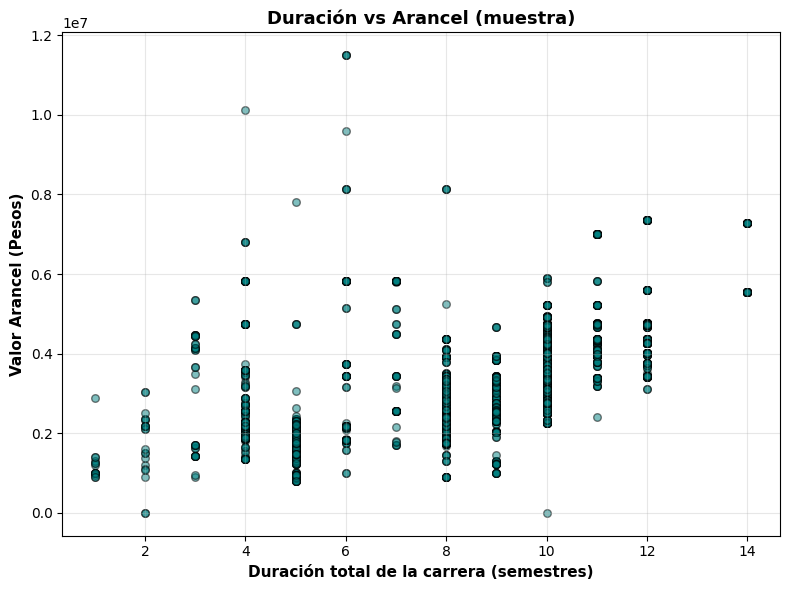


--- Histograma: Duración Total de Carrera

ANÁLISIS DE NORMALIDAD: DURACIÓN TOTAL DE CARRERA (SEMESTRES)
Media:                               8.23
Mediana:                             9.00
Moda:                               10.00
Desviación Estándar:                 2.56

Coeficiente de Asimetría:              -0.3310
Coeficiente de Curtosis:               -0.8330

--- Interpretación ---
Asimetría: Simétrica (distribución aproximadamente normal)
Curtosis:  Platicúrtica (menor concentración en el centro)

¿Sigue distribución normal? ✗ NO



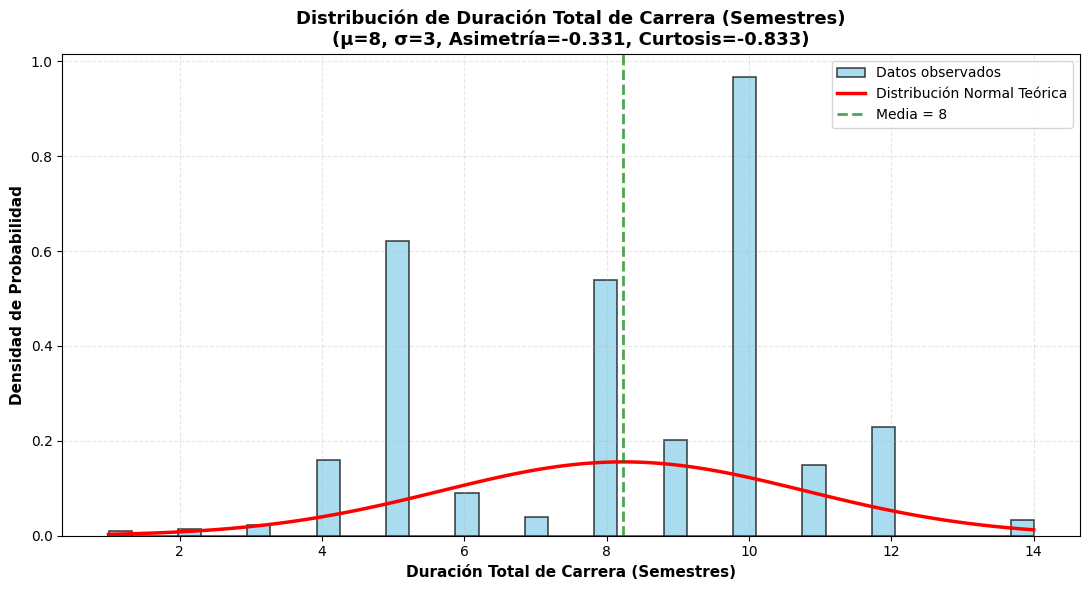


--- Histograma: Valor Arancel

ANÁLISIS DE NORMALIDAD: VALOR DE ARANCEL (PESOS)
Media:                       3,125,569.21
Mediana:                     2,875,000.00
Moda:                        4,740,000.00
Desviación Estándar:         1,266,743.40

Coeficiente de Asimetría:               0.8788
Coeficiente de Curtosis:                1.6228

--- Interpretación ---
Asimetría: Asimétrica POSITIVA (sesgo hacia la derecha)
Curtosis:  Leptocúrtica (mayor concentración en el centro)

¿Sigue distribución normal? ✗ NO



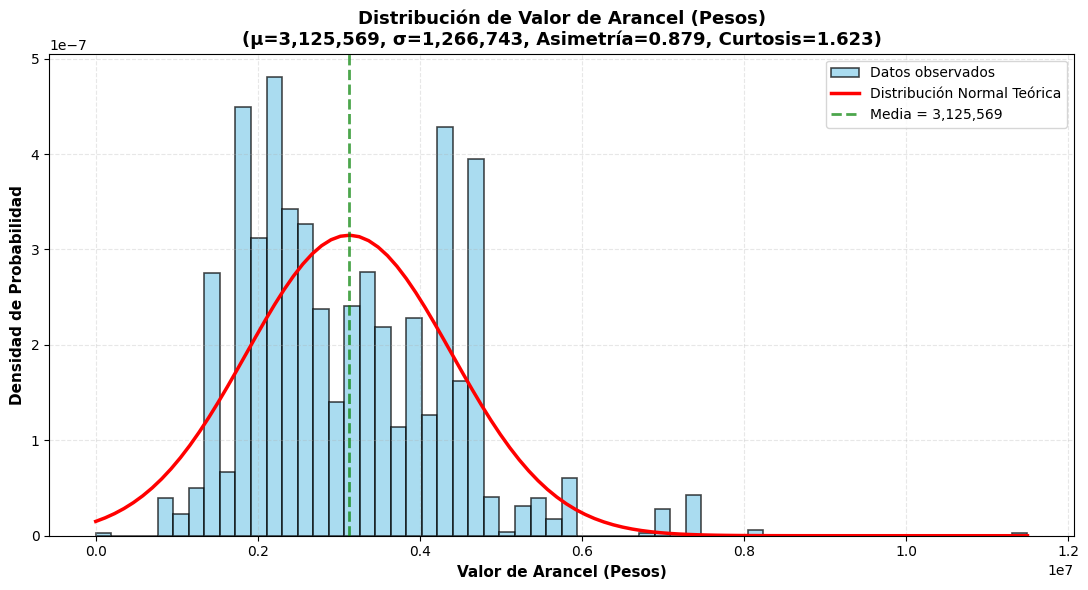

(3125569.2056,
 1266743.3951997038,
 0.8788427876288045,
 1.622765244377331,
 False)

In [34]:
# Scatter: Duración vs Valor Arancel (separado)
plt.figure(figsize=(8,6))
try:
    data_scatter2 = sample2
except NameError:
    data_scatter2 = exam_df.sample(n=5000, random_state=24)

plt.scatter(data_scatter2['DURACION TOTAL CARRERA (SEMESTRES)'], data_scatter2['VALOR ARANCEL (PESOS)'],
            alpha=0.5, s=30, color='teal', edgecolor='k')
plt.xlabel('Duración total de la carrera (semestres)', fontsize=11, fontweight='bold')
plt.ylabel('Valor Arancel (Pesos)', fontsize=11, fontweight='bold')
plt.title('Duración vs Arancel (muestra)', fontsize=13, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Histogramas separados con campana de Gauss
print('\n--- Histograma: Duración Total de Carrera')
analizar_normalidad(data_scatter2['DURACION TOTAL CARRERA (SEMESTRES)'], 'Duración Total de Carrera (Semestres)', bins=40)

print('\n--- Histograma: Valor Arancel')
analizar_normalidad(data_scatter2['VALOR ARANCEL (PESOS)'], 'Valor de Arancel (Pesos)', bins=60)


## Ítem 2: Análisis de modalidades y probabilidades

En este apartado se trabaja con variables categóricas para responder las siguientes preguntas:

1. **Vuelta a la presencialidad:** se examina la distribución de las modalidades de estudio (`MODALIDAD`) para determinar si predomina la presencialidad o si ganan terreno los formatos que incluyen la no presencialidad.
2. **Tipo de institución y modalidad:** se analiza qué tipo de institución utiliza en mayor proporción modalidades no exclusivamente presenciales.
3. **Probabilidades por género y área:** se calcula la probabilidad de que un estudiante seleccionado al azar sea del área de educación condicionado a ser hombre o mujer, y se comparan las diferencias.


In [35]:
# 1. Distribución de las modalidades (porcentaje)
mod_counts = exam_df['MODALIDAD'].value_counts(normalize=True) * 100
print('Distribución de modalidades (%):')
print(mod_counts)

# 2. Tabla cruzada de tipo de institución vs modalidad (porcentaje por fila)
tabla_modalidad = pd.crosstab(exam_df['TIPO DE INSTITUCION'], exam_df['MODALIDAD'], normalize='index') * 100
print('\nPorcentaje de modalidades por tipo de institución:')
print(tabla_modalidad)

# Identificar el tipo con mayor proporción de formatos no presenciales
# Suponemos que 'Presencial' indica presencialidad; el resto se considera no exclusiva.
no_pres = [m for m in exam_df['MODALIDAD'].unique() if 'Presencial' not in m or m != 'Presencial']
tabla_modalidad['No Presencial'] = tabla_modalidad[[c for c in tabla_modalidad.columns if c != 'Presencial']].sum(axis=1)
max_no_pres = tabla_modalidad['No Presencial'].idxmax()
print(f"\nTipo de institución con mayor porcentaje de formatos no exclusivamente presenciales: {max_no_pres}")

# 3. Probabilidades condicionadas por género de pertenecer al área Educación
prob_area_genero = pd.crosstab(exam_df['GENERO'], exam_df['AREA CONOCIMIENTO'], normalize='index') * 100
prob_educ = prob_area_genero['Educacion']
print('\nProbabilidad de que un estudiante sea del área Educación condicionado al género (%):')
print(prob_educ)


Distribución de modalidades (%):
MODALIDAD
Presencial        97.794831
Semipresencial     1.598015
No Presencial      0.607154
Name: proportion, dtype: float64

Porcentaje de modalidades por tipo de institución:
MODALIDAD                     No Presencial  Presencial  Semipresencial
TIPO DE INSTITUCION                                                    
Centros de Formacion Tecnica       0.876465   99.123535        0.000000
Institutos Profesionales           0.560841   99.265228        0.173932
Universidades CRUCH                0.274587   99.425656        0.299757
Universidades Privadas             1.094959   92.996035        5.909005

Tipo de institución con mayor porcentaje de formatos no exclusivamente presenciales: Universidades Privadas

Probabilidad de que un estudiante sea del área Educación condicionado al género (%):
GENERO
Femenino     14.552540
Masculino     6.575461
Name: Educacion, dtype: float64


## Análisis de Probabilidades Condicionales - Basado en Laboratorio 7

En esta sección se realizan análisis de probabilidades condicionales similares a los del Laboratorio 7, utilizando tablas cruzadas y visualizaciones para categorías.


███████████████████████████████████████████████████████████████████████████
█                                                                         █
█           ANÁLISIS CRUZADO 1: MODALIDAD x TIPO DE INSTITUCIÓN           █
█                                                                         █
███████████████████████████████████████████████████████████████████████████

Tabla de Frecuencias Absolutas:
MODALIDAD                     No Presencial  Presencial  Semipresencial  \
TIPO DE INSTITUCION                                                       
Centros de Formacion Tecnica             95       10744               0   
Institutos Profesionales                158       27965              49   
Universidades CRUCH                     120       43451             131   
Universidades Privadas                  290       24630            1565   
All                                     663      106790            1745   

MODALIDAD                        All  
TIPO DE INSTITUCION  

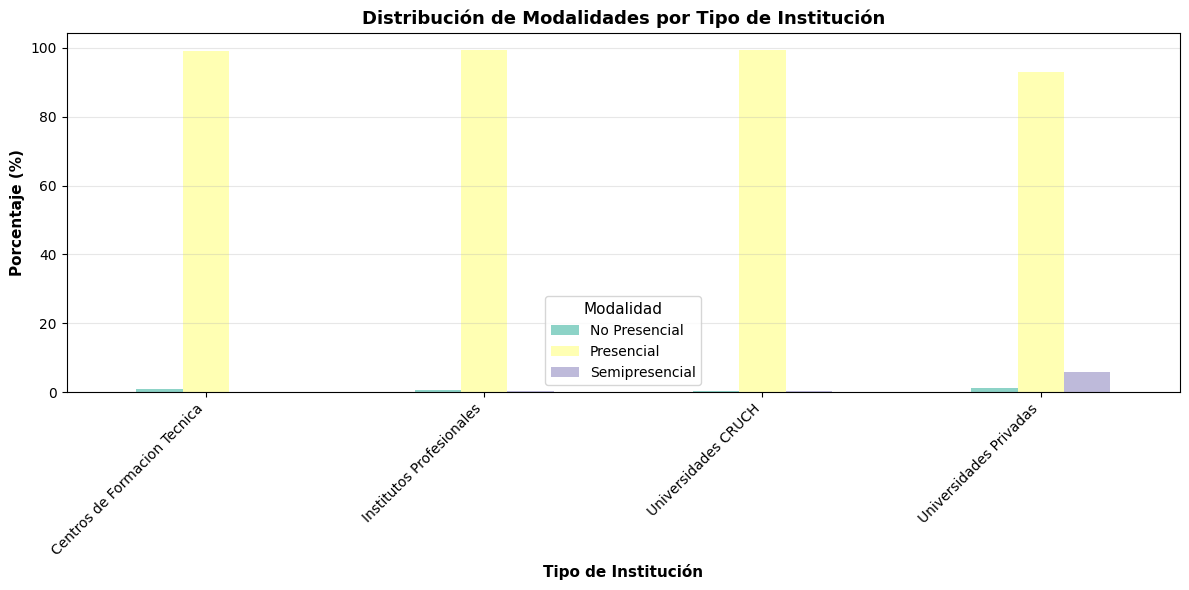

In [36]:
# TABLA CRUZADA: MODALIDAD vs TIPO DE INSTITUCIÓN (FRECUENCIAS ABSOLUTAS)
print("\n" + "█"*75)
print("█" + " "*73 + "█")
print("█" + "ANÁLISIS CRUZADO 1: MODALIDAD x TIPO DE INSTITUCIÓN".center(73) + "█")
print("█" + " "*73 + "█")
print("█"*75 + "\n")

# Tabla de frecuencias absolutas
tabla_mod_inst_abs = pd.crosstab(exam_df['TIPO DE INSTITUCION'], exam_df['MODALIDAD'], margins=True)
print("Tabla de Frecuencias Absolutas:")
print(tabla_mod_inst_abs)

# Tabla de frecuencias relativas (%)
tabla_mod_inst_rel = pd.crosstab(exam_df['TIPO DE INSTITUCION'], exam_df['MODALIDAD'], 
                                  normalize='index') * 100
print("\nTabla de Frecuencias Relativas por Tipo de Institución (%):")
print(tabla_mod_inst_rel.round(2))

# Probabilidades condicionales
print("\n--- Probabilidades Condicionales ---")
for tipo_inst in exam_df['TIPO DE INSTITUCION'].unique():
    total_tipo = len(exam_df[exam_df['TIPO DE INSTITUCION'] == tipo_inst])
    presencial = len(exam_df[(exam_df['TIPO DE INSTITUCION'] == tipo_inst) & 
                             (exam_df['MODALIDAD'] == 'Presencial')])
    prob_pres_cond = (presencial / total_tipo) * 100
    print(f"P(Presencial | {tipo_inst}):  {prob_pres_cond:.2f}%")

# Gráfico: Comparación de modalidades por tipo de institución
fig, ax = plt.subplots(figsize=(12, 6))
tabla_mod_inst_rel.plot(kind='bar', ax=ax, color=plt.cm.Set3(range(len(tabla_mod_inst_rel.columns))))
ax.set_title('Distribución de Modalidades por Tipo de Institución', fontsize=13, fontweight='bold')
ax.set_xlabel('Tipo de Institución', fontsize=11, fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
ax.legend(title='Modalidad', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


███████████████████████████████████████████████████████████████████████████
█                                                                         █
█            ANÁLISIS CRUZADO 2: GÉNERO x ÁREA DE CONOCIMIENTO            █
█                                                                         █
███████████████████████████████████████████████████████████████████████████

Tabla de Frecuencias Absolutas:
AREA CONOCIMIENTO  Administracion y Comercio  Agropecuaria  \
GENERO                                                       
Femenino                                9885          1973   
Masculino                               7479          1202   
All                                    17364          3175   

AREA CONOCIMIENTO  Arte y Arquitectura  Ciencias Basicas  Ciencias Sociales  \
GENERO                                                                        
Femenino                          3583              1014               6936   
Masculino                         2443

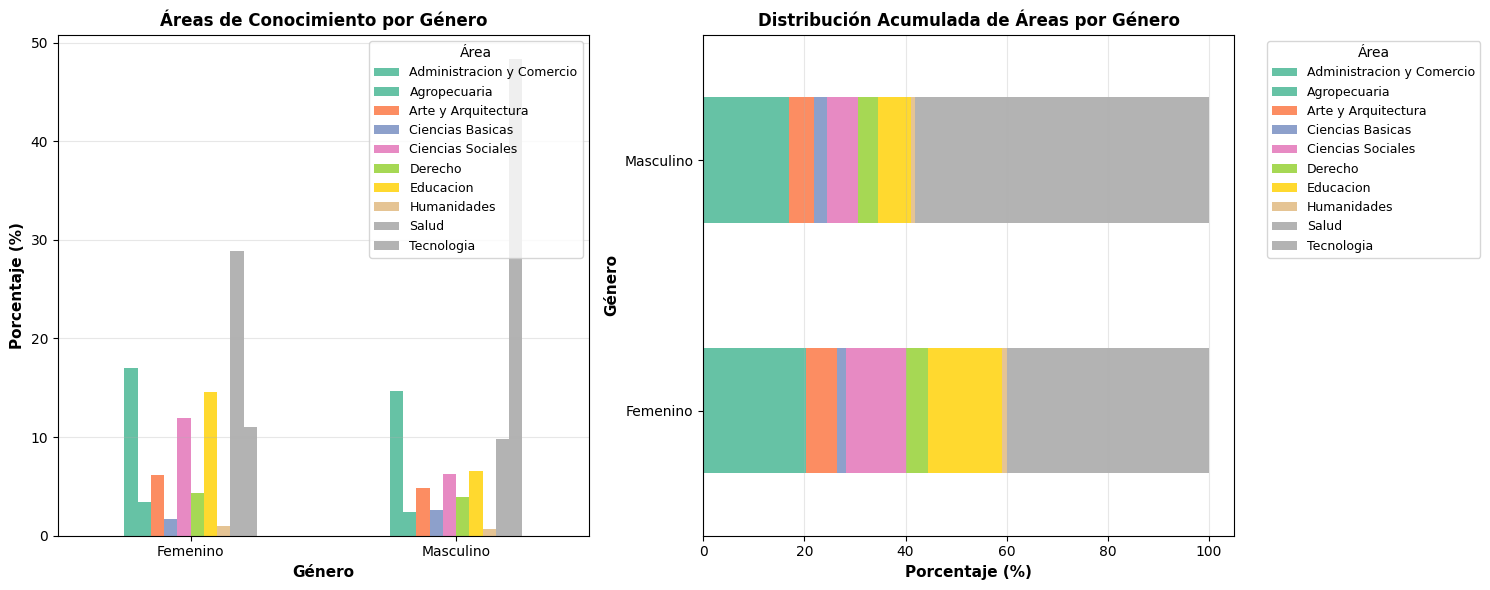

In [37]:
# TABLA CRUZADA: GÉNERO vs ÁREA DE CONOCIMIENTO
print("\n" + "█"*75)
print("█" + " "*73 + "█")
print("█" + "ANÁLISIS CRUZADO 2: GÉNERO x ÁREA DE CONOCIMIENTO".center(73) + "█")
print("█" + " "*73 + "█")
print("█"*75 + "\n")

# Tabla de frecuencias absolutas
tabla_gen_area_abs = pd.crosstab(exam_df['GENERO'], exam_df['AREA CONOCIMIENTO'], margins=True)
print("Tabla de Frecuencias Absolutas:")
print(tabla_gen_area_abs)

# Tabla de frecuencias relativas (%)
tabla_gen_area_rel = pd.crosstab(exam_df['GENERO'], exam_df['AREA CONOCIMIENTO'], 
                                  normalize='index') * 100
print("\nTabla de Frecuencias Relativas por Género (%):")
print(tabla_gen_area_rel.round(2))

# Probabilidades condicionales específicas
print("\n--- Probabilidades Condicionales Clave ---")
for genero in exam_df['GENERO'].unique():
    total_genero = len(exam_df[exam_df['GENERO'] == genero])
    for area in ['Educacion', 'Ingenieria', 'Administracion']:
        if area in exam_df['AREA CONOCIMIENTO'].unique():
            cantidad = len(exam_df[(exam_df['GENERO'] == genero) & 
                                   (exam_df['AREA CONOCIMIENTO'] == area)])
            prob = (cantidad / total_genero) * 100
            print(f"P({area} | {genero}):  {prob:.2f}%")

# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Barras agrupadas
tabla_gen_area_rel.plot(kind='bar', ax=ax1, colormap='Set2')
ax1.set_title('Áreas de Conocimiento por Género', fontsize=12, fontweight='bold')
ax1.set_xlabel('Género', fontsize=11, fontweight='bold')
ax1.set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
ax1.legend(title='Área', fontsize=9, title_fontsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Gráfico 2: Barras apiladas
tabla_gen_area_rel.plot(kind='barh', stacked=True, ax=ax2, colormap='Set2')
ax2.set_title('Distribución Acumulada de Áreas por Género', fontsize=12, fontweight='bold')
ax2.set_xlabel('Porcentaje (%)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Género', fontsize=11, fontweight='bold')
ax2.legend(title='Área', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Resumen Comparativo de Análisis

A continuación se presenta un resumen de los hallazgos principales en relación a la normalidad de las distribuciones y las probabilidades condicionales.

In [38]:
# Crear tabla resumen de normalidad
print("\n" + "█"*80)
print("█" + " "*78 + "█")
print("█" + "TABLA RESUMEN: ANÁLISIS DE NORMALIDAD".center(78) + "█")
print("█" + " "*78 + "█")
print("█"*80 + "\n")

resumen_normalidad = pd.DataFrame({
    'Variable': ['Valor de Matrícula', 'Valor de Arancel', 'Duración de Carrera'],
    'Media': [f'${media_mat:,.0f}', f'${media_ar:,.0f}', f'{media_dur:.2f} sem'],
    'Desv. Estándar': [f'${desv_mat:,.0f}', f'${desv_ar:,.0f}', f'{desv_dur:.2f} sem'],
    'Asimetría': [f'{asim_mat:.4f}', f'{asim_ar:.4f}', f'{asim_dur:.4f}'],
    'Curtosis': [f'{curt_mat:.4f}', f'{curt_ar:.4f}', f'{curt_dur:.4f}'],
    '¿Es Normal?': ['✓ Sí' if es_norm_mat else '✗ No', 
                    '✓ Sí' if es_norm_ar else '✗ No',
                    '✓ Sí' if es_norm_dur else '✗ No']
})

print(resumen_normalidad.to_string(index=False))
print("\n" + "█"*80)

# Tabla resumen de probabilidades
print("\n" + "█"*80)
print("█" + " "*78 + "█")
print("█" + "TABLA RESUMEN: PROBABILIDADES EN INTERVALO [μ-σ, μ+σ]".center(78) + "█")
print("█" + " "*78 + "█")
print("█"*80 + "\n")

resumen_prob = pd.DataFrame({
    'Variable': ['Valor de Matrícula', 'Valor de Arancel', 'Duración de Carrera'],
    'P(μ-σ < X < μ+σ)': [f'{prob_1sigma:.2f}%', f'{prob_1sigma_ar:.2f}%', f'{prob_1sigma_dur:.2f}%'],
    'P(μ-2σ < X < μ+2σ)': [f'{prob_2sigma:.2f}%', f'{prob_2sigma_ar:.2f}%', f'{prob_2sigma_dur:.2f}%']
})

print(resumen_prob.to_string(index=False))
print("\n" + "█"*80)

# Interpretación final
print("\n" + "■"*80)
print("■ CONCLUSIONES")
print("■"*80)
print("""
1. ANÁLISIS DE DISTRIBUCIÓN NORMAL:
   - Se evaluó la normalidad mediante coeficientes de asimetría y curtosis
   - Los valores se interpretan según rangos: [-0.5, +0.5] = distribución aproximadamente normal
   
2. PROBABILIDADES BAJO DISTRIBUCIÓN NORMAL:
   - Se calcularon probabilidades acumuladas usando la función norm.cdf()
   - El intervalo [μ-σ, μ+σ] contiene aproximadamente el 68% de los datos en una distribución normal
   - El intervalo [μ-2σ, μ+2σ] contiene aproximadamente el 95% de los datos
   
3. ANÁLISIS DE PROBABILIDADES CONDICIONALES:
   - Se utilizaron tablas cruzadas para evaluar relaciones entre variables categóricas
   - Se calcularon probabilidades condicionales: P(A|B) = P(A∩B) / P(B)
   - Se identificaron patrones en la distribución de modalidades por tipo de institución
   - Se evaluó la relación entre género y área de conocimiento

4. METODOLOGÍA ESTADÍSTICA:
   - Este análisis combina técnicas del Laboratorio 7 (Probabilidades) y Laboratorio 8 (Distribución Normal)
   - Se utilizó Python con bibliotecas como scipy.stats para cálculos precisos
   - Se presentaron visualizaciones (histogramas, gráficos de barras) para facilitar la interpretación
""")
print("■"*80)


████████████████████████████████████████████████████████████████████████████████
█                                                                              █
█                    TABLA RESUMEN: ANÁLISIS DE NORMALIDAD                     █
█                                                                              █
████████████████████████████████████████████████████████████████████████████████

           Variable      Media Desv. Estándar Asimetría Curtosis ¿Es Normal?
 Valor de Matrícula   $219,393       $114,142    3.5779  57.0124        ✗ No
   Valor de Arancel $3,141,605     $1,270,629    0.7550   0.8780        ✗ No
Duración de Carrera   8.19 sem       2.60 sem   -0.3069  -0.9025        ✗ No

████████████████████████████████████████████████████████████████████████████████

████████████████████████████████████████████████████████████████████████████████
█                                                                              █
█            TABLA RESUMEN: PROBABILIDAD